# Car Price Prediction - Team 6

- Sky Lim En Xing (U2223731A)
- Thomas Tan Keat Hao (U2221472J)
- Chermine Cheah Xue Min (U2222126F)


# 1) Introduction


In this project, we would like to find out which factors affect the prices of cars most: be it its Brand, Model, Engine, Mileage... etc, and use these factors to predict the prices of cars, allowing prudent carbuyers to get the most value out of their money. 

Car prices are rising globally, and whilst car prices may be affected by various localisation factors (e.g. different currencies or government policies), the defining characteristic of a car (i.e. make of the car) remains constant. In this project, we will be using a dataset on car sales, detailing each car model's specifications and usage statistics and the dealers' asking Price. We will then build a machine learning model that is able to consider and use these defining characteristics of a car to predict any car's price.

With our model, a potential carbuyer could find out the estimated cost of their dream car, allowing them to navigate the car market more efficiently, and hence be able to make an informed decision on whether to settle on this specific car or reconsider their options, getting the most bang for one's buck.

## Overview:
- 2) Data Pre-processing <br>
    * This stage comprises two parts: Data Pre-processing and Exploratory Data Analysis (EDA). <br>

    * Pre-processing consists of two sections:<br>
    **1) Data Engineering**: the process of collecting, cleaning, and transforming raw data into a format suitable for analysis. It involves tasks such as removing outliers and handling missing values, as well as ensuring all data is of the appropriate data type. <br>
    **2) Feature Engineering**: involves transforming raw data into meaningful features that can be used to train a machine learning model. This includes data encoding for categorical features and scaling for numerical features. <br>

    * **Exploratory Data Analysis** involves observing and determining trends in our dataset, as well as developing columns that are useful for determining car prices. Having these would help us train our machine learning model effectively and get accurate car prices.<br><br>

- 3) & 4. Methodology and Experiments<br>
    * This section involves training and testing four machines learning models based on categorical and numerical features obtained from preprocessing. Furthermore, we will use GridSearchCV to tune the hyperparameters of the 4 models to  maximize each model's performance.

    * We would also measure their effectiveness using a variety of metrics such as R-squared (R²) score, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), which will allow us to compare the different models we have built and determine the model that is most effective at predicting car price. <br><br>

- 5) Conclusion
    * Lastly, we will summarize our findings from this project and determine any limitations and possible improvements we could make to our model.

In [1]:
# importing significant modules, models & functions 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy as sp
import warnings

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
random_state = 1


The dataset we will be using consist of each car model's average selling price.<br>


The data features description is as follows:
- Brand: Contains the various brands for Cars
- Price: Contains the price of the Car
- Body: Contains the name of main supporting of motor vehicle
- Mileage: Contains the number of mileage of car
- EngineV: Contains the engine version of Car
- Engine Type: Contains the type of Engine (Patrol/Gas/Diesel)
- Registration: Show whether the car is registered or not
- Year: Contains the year of manufacturing of Car
- Model: Contains the model of Car

#### Get Car data 

In [2]:
df = pd.read_csv('car_sales.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# 2) Data-Preprocessing

## 2a) Data/Feature Engineering

## Data Engineering

In [3]:
# another DF for pre-processing
new_df = df.copy()
new_df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


#### Ensuring no _NULL_ values 
As there are rows with _NULL_ values, it may cause unneccessary noise and affect our model's accuracies. Hence, we will be removing them from the dataset.

In [4]:
# number of null values
nan_count = new_df.isna().sum()
print(nan_count )

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64


#### In general, proportion of null values are small (4% of data); we will simply remove them from the dataset instead of replacing them, as dropping them will not significantly affect the analysis.

In [5]:
new_df.dropna(axis = 0, how="any", inplace = True)

In [6]:
new_df.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [7]:
print('Now, there are {} rows & columns respectively after removing NULL values.'.format(np.shape(new_df)))

Now, there are (4025, 9) rows & columns respectively after removing NULL values.


#### Ensuring all data is of the appropriate data type

In [8]:
# datatypes of columns
print(new_df.dtypes)

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object


In [9]:
# converting Price from float to int
new_df = new_df.astype({'Price':'int64'})

In [10]:
# datatypes of columns after conversion
print(new_df.dtypes)

Brand            object
Price             int64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object


In [11]:
new_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300,crossover,120,2.0,Petrol,yes,2011,Rav 4


#### Removing outliers
Outliers causes  measurement errors, data corruption, or simply represent extreme values in the underlying distribution. Hence we will remove them from the dataset.

[Text(0.5, 0, 'Mileage')]

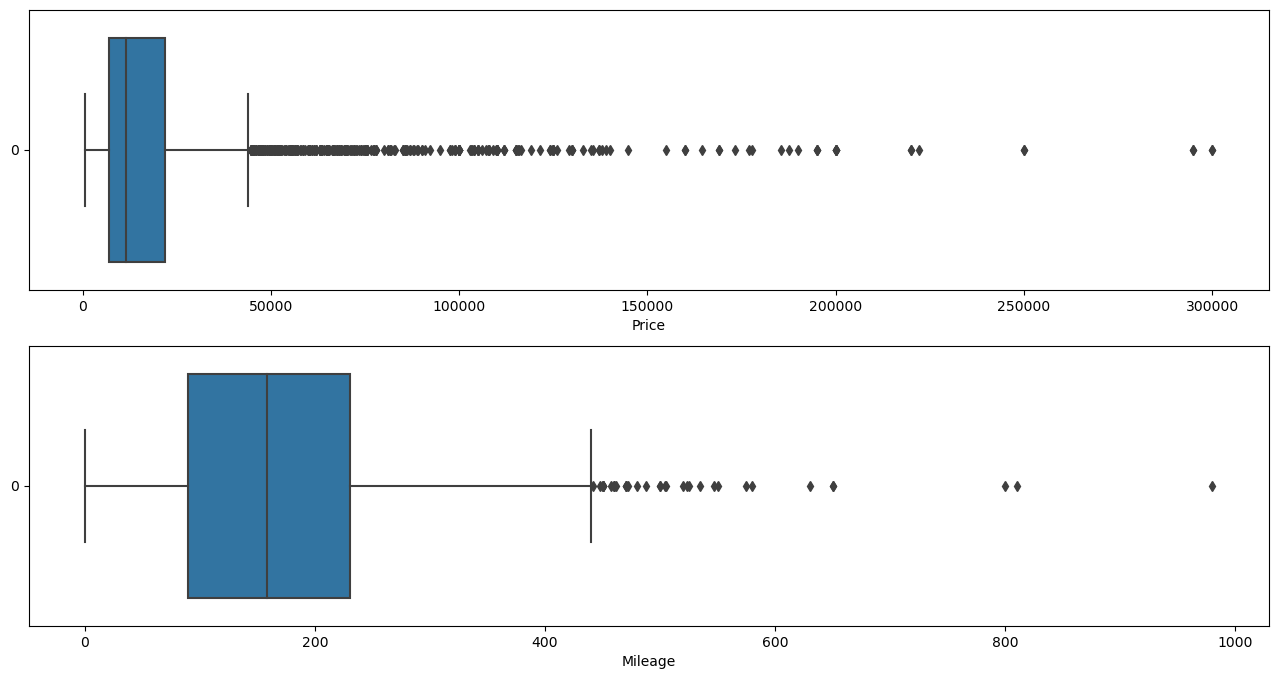

In [12]:
f, axes = plt.subplots(2, 1, figsize=(16, 8))
sb.boxplot(data = new_df['Price'], orient = "h",ax = axes[0]).set(xlabel='Price')
sb.boxplot(data = new_df['Mileage'], orient = "h", ax = axes[1]).set(xlabel='Mileage')

As we can see from the boxplots on Mileage and Price above, we can see a relatively significant number of outliers for Price and Mileage (defined by datapoints past the boxplots whiskers). We will use the IQR method to eliminate outliers.

In [13]:
#create a function to find outliers using IQR
def find_outliers_IQR(new_df):

   q1=new_df.quantile(0.25)

   q3=new_df.quantile(0.75)

   IQR=q3-q1

   outliers = new_df[((new_df<(q1-1.5*IQR)) | (new_df>(q3+1.5*IQR)))]

   return outliers

In [14]:
# outliers for Price
outliers = find_outliers_IQR(new_df['Price'])

print("number of outliers for Price: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers for Price: 355
max outlier value: 300000
min outlier value: 44600


In [15]:
# Replace data points that lie outside of the lower and the upper bound with a NULL value.
for x in ['Price']:
    q75,q25 = np.percentile(new_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    new_df.loc[new_df[x] < min,x] = np.nan
    new_df.loc[new_df[x] > max,x] = np.nan

In [16]:
# Drop rows with outliers
new_df = new_df.dropna(axis = 0)

In [17]:
#copy of DataFramed new_df for EDA later
vis_df= pd.DataFrame(new_df)

In [18]:
new_df.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV
10,Renault,11950.0,vagon,177,1.5,Diesel,yes,2011,Megane


In [19]:
print('Now, there are {} rows & columns respectively after removing Outliers.'.format(np.shape(new_df)))

Now, there are (3670, 9) rows & columns respectively after removing Outliers.


## Feature Engineering

### Categorical Features
Most categorical features in datasets are stored as string objects, which makes it hard for machine learning models to interpret and use. Hence we will need to convert these datas into more interpretable format.

### One-hot encoding for Brand, Body, Engine Type & Model
We will be using One-hot encoding to convert the categorical data into numeric data by splitting the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value. E.g. for column Brand, we’ll get seven new columns, one for each Brand — Audi, Mercedes-Benz, BMW...

In [20]:
categorical = ['Brand', 'Body','Engine Type', 'Model']

In [21]:
new_df = pd.get_dummies(new_df, columns = categorical)

In [22]:
new_df.head()

,Price,Mileage,EngineV,Registration,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,...,Model_Vista,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,yes,1991,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.0,427,2.9,yes,1999,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.0,358,5.0,yes,2003,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.0,240,4.2,yes,2007,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.0,120,2.0,yes,2011,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Label encoding for Registration
We will be using Label Encoding to represent categorical values in column Registration as numbers. 
- Registered: 1 ; Not-registered: 0

In [23]:
new_df['Registration'].unique()

array(['yes', 'no'], dtype=object)

In [24]:
label_encoder = preprocessing.LabelEncoder()

In [25]:
new_df['Registration']= label_encoder.fit_transform(new_df['Registration'])

In [26]:
new_df.head(100)

,Price,Mileage,EngineV,Registration,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,...,Model_Vista,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,1,1991,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.0,427,2.9,1,1999,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.0,358,5.0,1,2003,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.0,240,4.2,1,2007,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.0,120,2.0,1,2011,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,19200.0,190,2.7,1,2005,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,11100.0,119,2.4,1,2008,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
115,8200.0,139,1.5,1,2012,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
116,10300.0,235,2.0,1,2007,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Numeric Features

By scaling numeric features, we will ensure that they have similar ranges and distributions. This is significant because many machine learning algorithms rely on the assumption that features are similar. If the features have different ranges, some may dominate the model and influence outcomes more than others. Scaling numeric data converts them into a standardized form suitable for machine learning.

In [27]:
numerical = ['Mileage', 'EngineV', 'Registration', 'Year']

In [28]:
# Scale numerical features using the StandardScaler function
scaler = StandardScaler()
new_df[numerical] = scaler.fit_transform(new_df[numerical])

#### Results after Standardization will be shown by a Violin plot under Exploratory Data Analysis.

## 2b) Exploratory Data Analysis

In [29]:
# no of rows and cols of data (.shape)
print('After Data-Preprocessing, there are {} rows & columns respectively.'.format(np.shape(new_df)))

After Data-Preprocessing, there are (3670, 305) rows & columns respectively.


In [30]:
# info of dataset
new_df.head()

,Price,Mileage,EngineV,Registration,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,...,Model_Vista,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,1.039610,-0.135347,0.335348,-2.245720,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.0,2.577004,0.039376,0.335348,-1.018486,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.0,1.869803,0.447063,0.335348,-0.404870,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.0,0.660387,0.291754,0.335348,0.208747,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.0,-0.569528,-0.135347,0.335348,0.822363,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Types of data in dataset (as seen above):
#### Numerical: Price, Mileage, EngineV, Year
#### Categorical: Brand, Body, Engine Type, Registration, Model

We will perform some EDA to see how the different features in dataset are related to one another

In [31]:
# Statistics of numerical features. Because of standardisation, numbers are scaled to near each other
# It is hard to read, but the visualisation below help us better understand this table
new_df[['Mileage','EngineV','Year','Price']].describe()

,Mileage,EngineV,Year,Price
count,3.670000e+03,3.670000e+03,3.670000e+03,3670.000000
mean,5.953458e-17,5.324230e-17,-2.616617e-15,13338.788828
std,1.000136e+00,1.000136e+00,1.000136e+00,9581.341708
min,-1.799443e+00,-4.071378e-01,-5.620611e+00,600.000000
25%,-6.925197e-01,-1.741739e-01,-5.582740e-01,6650.000000
50%,-7.756228e-02,-1.353465e-01,2.087467e-01,10500.000000
75%,6.398881e-01,1.996274e-02,8.223632e-01,17900.000000
max,6.399990e+00,1.888810e+01,1.589384e+00,44000.000000


The table above shows a brief overview of each numerical features statistics, the numbers are a bit hard to interpret and compare as we applied StandardScaler earlier to transform each feature to have a mean of ~0 and a standard deviation of ~1 (follows a normal distribution) for use in our machine learing models. 

We will use a violinplot to better visualise the distribution of the data (after Standardization) below.

<AxesSubplot:xlabel='Price'>

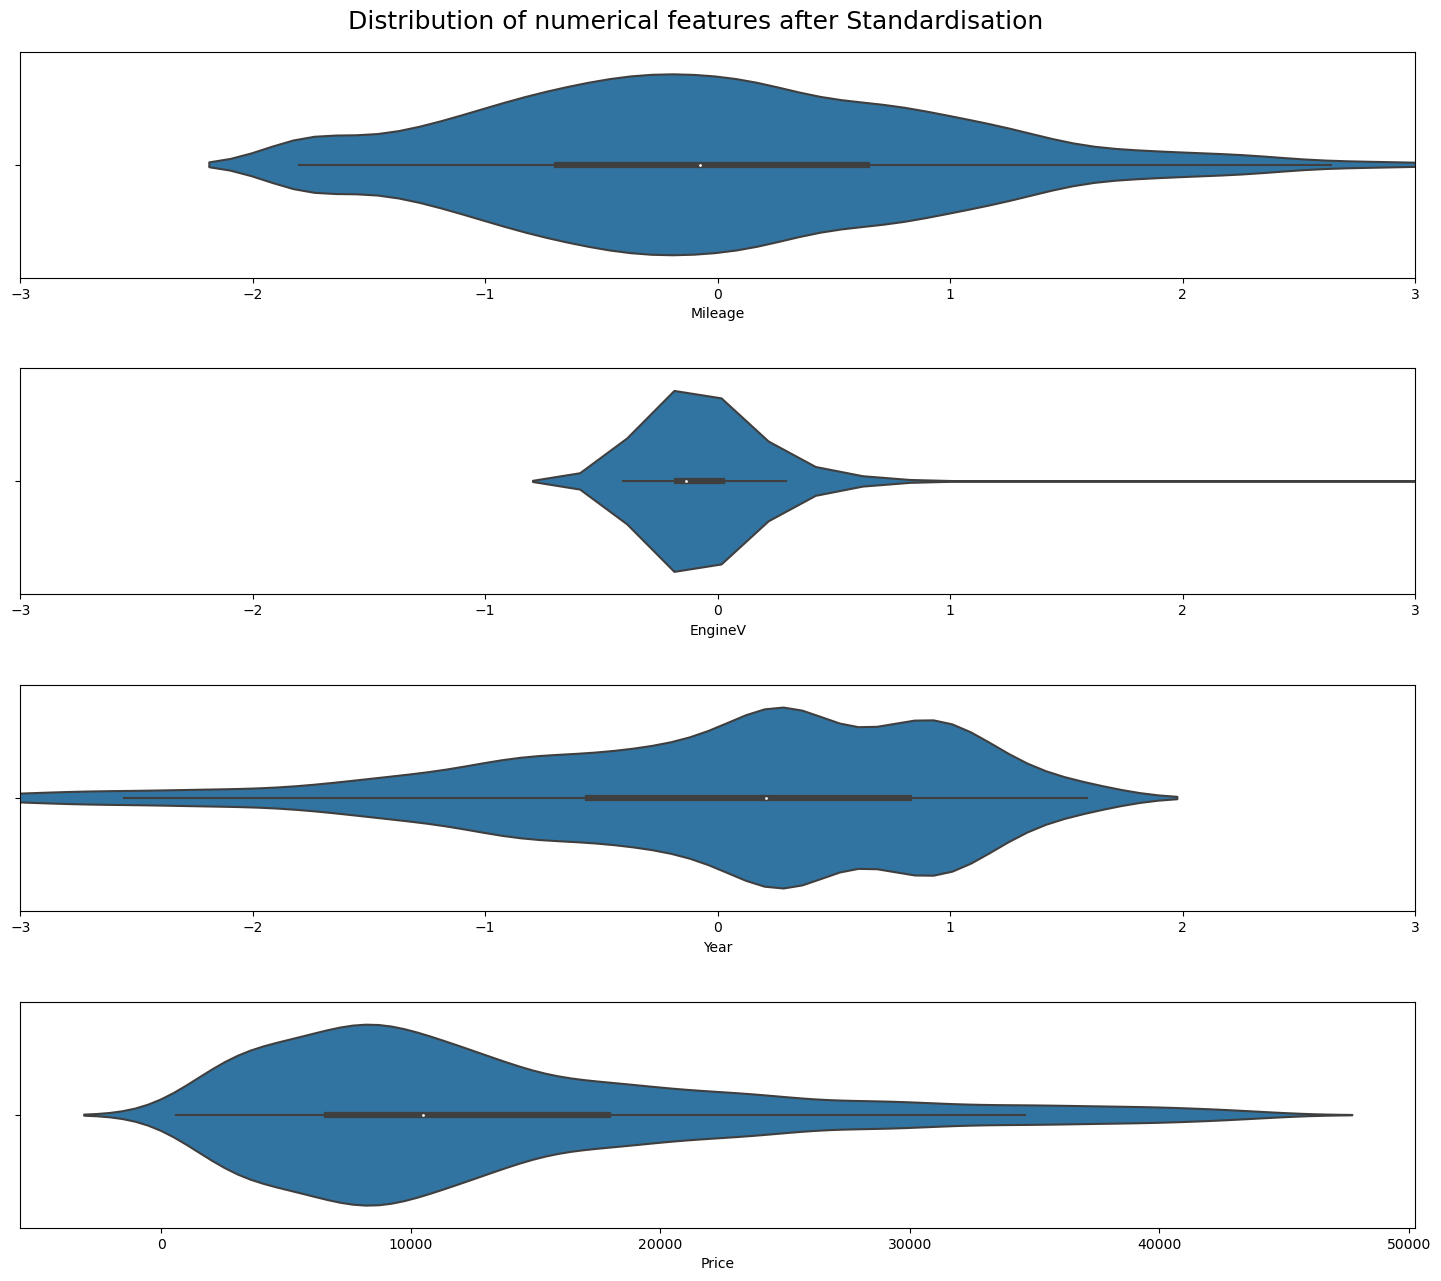

In [761]:
# Distribution of numerical features after Standardisation 
fig, axes = plt.subplots(nrows=4, figsize=(18,14))
fig.suptitle('Distribution of numerical features after Standardisation', fontsize=18)
plt.subplots_adjust(top=0.95, hspace=0.4)
# Mileage plot
sb.violinplot(x='Mileage', data=new_df[['Mileage','EngineV','Year','Price']], ax=axes[0])
axes[0].set_xlim([-3, 3]) # set x-axis limits

# EngineV plot
sb.violinplot(x='EngineV', data=new_df[['Mileage','EngineV','Year','Price']], ax=axes[1])
axes[1].set_xlim([-3, 3]) # set x-axis limits

# Year plot
sb.violinplot(x='Year', data=new_df[['Mileage','EngineV','Year','Price']], ax=axes[2])
axes[2].set_xlim([-3, 3]) # set x-axis limits

# Price plot
sb.violinplot(x='Price', data=new_df[['Mileage','EngineV','Year','Price']], ax=axes[3])


The violin plots above show that Mileage, EngineV, and Year have their medians around 0, and most of the data is distributed near the median following a normal distribution curve. This is expected as the dataset has undergone standardization, scaling each numerical feature and transforming it to approximately follow a normal distribution curve.

The black bolded line in the violin plot shows the Inter-Quartile Range (IQR), which indicates the distribution of each feature. EngineV has the lowest distribution, followed by Mileage and then Year. Year also slightly skews negatively compared to EngineV and Mileage, which have almost a perfectly normal distribution.

The Price of a car has a median of approximately 10000 and skews positively, indicating that there are more cheaper cars in the dataset than expensive ones. However, at higher price points, there is a fairly equal number of cars, as seen by the trailing tail.
<br>   

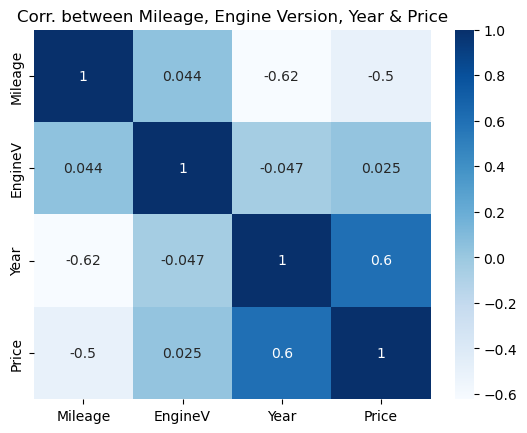

In [33]:
# Correlation between numerical features
sb.heatmap(new_df[['Mileage','EngineV','Year','Price']].corr(), cmap='Blues', annot=True)
plt.title("Corr. between Mileage, Engine Version, Year & Price")
plt.show()

We can note from the correlation heatmap that most of our numerical predictors have a moderate correlation with our response target Price at best. For instance, Year and Price has a correlation factor of 0.6, which means that more recently produced cars tends to slightly cost higher as compared to older ones. Mileage and Price has a correlation factor of -0.5, again, a moderate relationship where a car's Mileage increase, its selling Price decrease.

EngineV has a weak relationship with Price, at only 0.025, which means the Engine Version of a car has only a minor impact on its selling Price. This could be because the engine version is usually not revealed or known to carbuyers during their purchase, and regular carbuyers tend to prioritise how new/used a car is over its exact hardware details.

In [34]:
# Categorical features overview
vis_df[['Brand','Body','Engine Type','Registration','Model']].describe()

,Brand,Body,Engine Type,Registration,Model
count,3670,3670,3670,3670,3670
unique,7,6,4,2,283
top,Volkswagen,sedan,Diesel,yes,E-Class
freq,853,1459,1631,3299,186


In this table, we get a brief overview of our categorical features, with 'top' showing the most frequently appeared type of feature in a car. Model has an unsurprisingly high number of unique values as we are considering many different types of car.

<AxesSubplot:xlabel='count', ylabel='Registration'>

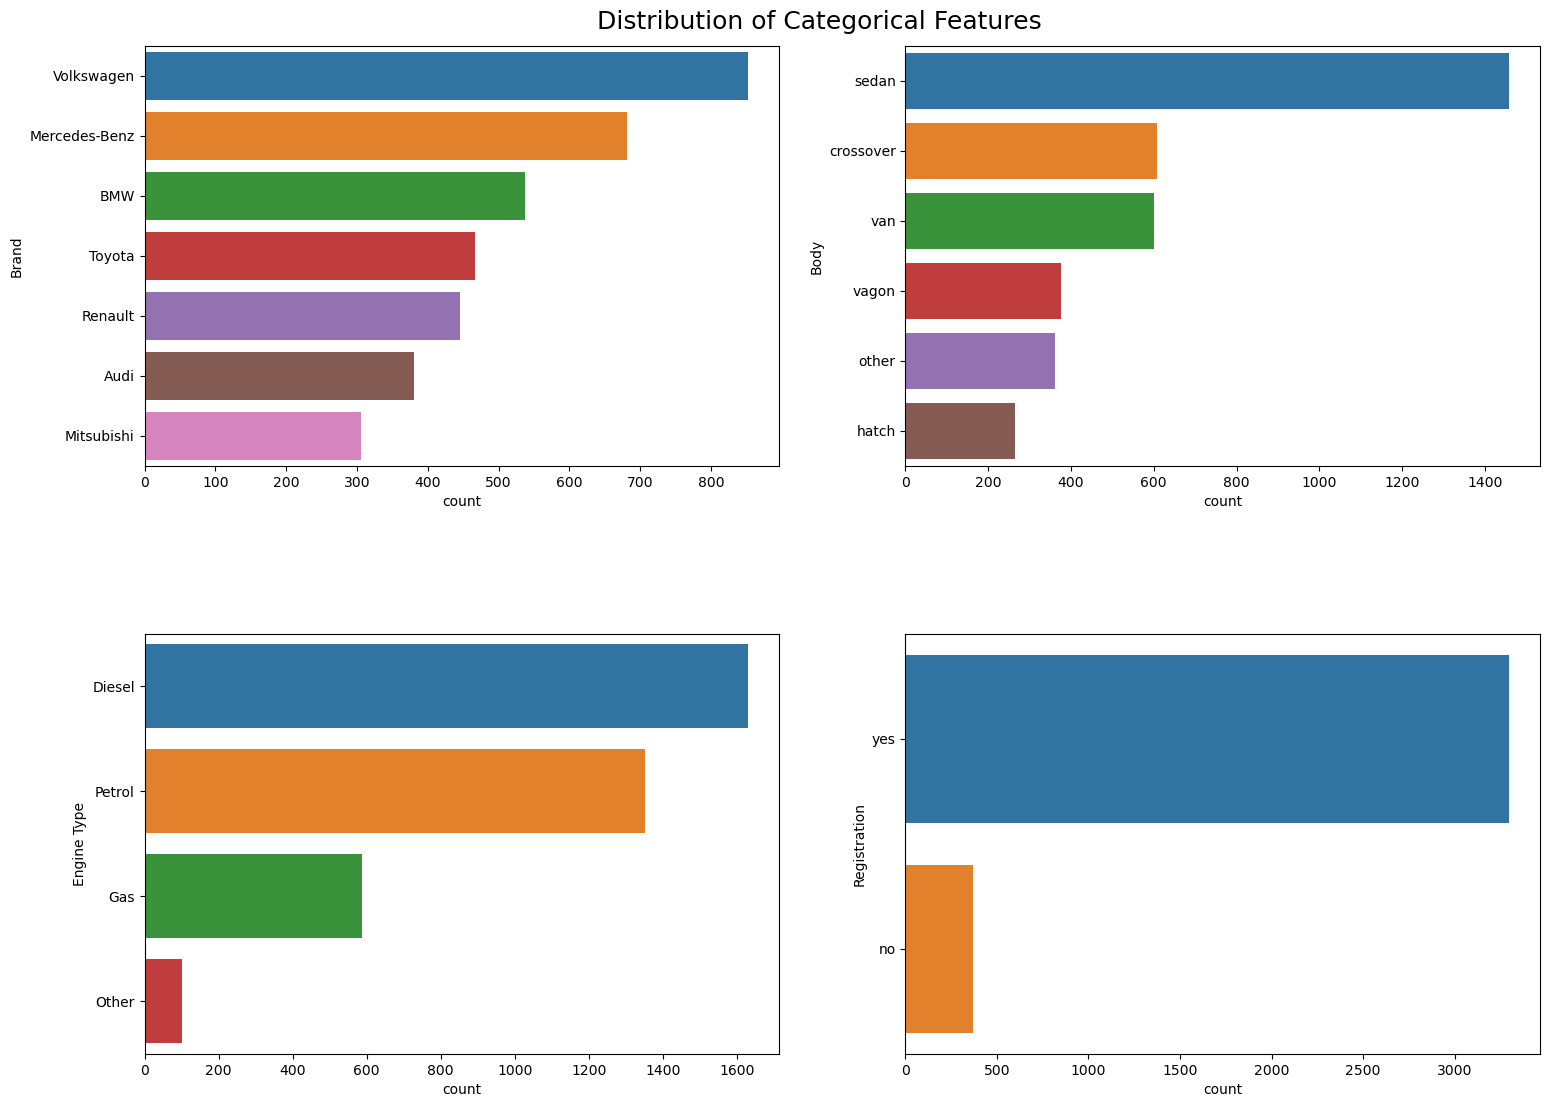

In [759]:
# Distribution of categorical features
# Draw the distributions of all variables
# Sort values by count for each categorical feature
sorted_brand = vis_df['Brand'].value_counts().index
sorted_body = vis_df['Body'].value_counts().index
sorted_engine = vis_df['Engine Type'].value_counts().index
sorted_reg = vis_df['Registration'].value_counts().index

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
plt.subplots_adjust(top=0.95, hspace=0.4)
fig.suptitle('Distribution of Categorical Features (boxplot)', fontsize=18)
sb.countplot(y='Brand', data=vis_df, order=sorted_brand, ax=axes.flatten()[0])
sb.countplot(y='Body', data=vis_df, order=sorted_body, ax=axes.flatten()[1])
sb.countplot(y='Engine Type', data=vis_df, order=sorted_engine, ax=axes.flatten()[2])
sb.countplot(y='Registration', data=vis_df, order=sorted_reg, ax=axes.flatten()[3])

In the bargraphs above, we have ranked each distinct features of a category based on their frequency of appearance in the dataset, allowing us to see the distribution of data. For instance, majority of the cars sold are sedans, registered, and diesel fueled. Most buyers in the dataset seem to prefer Volkswagen and Mercedes-Benz, which has a noticeable difference in frequency compared to the rest of the brands.

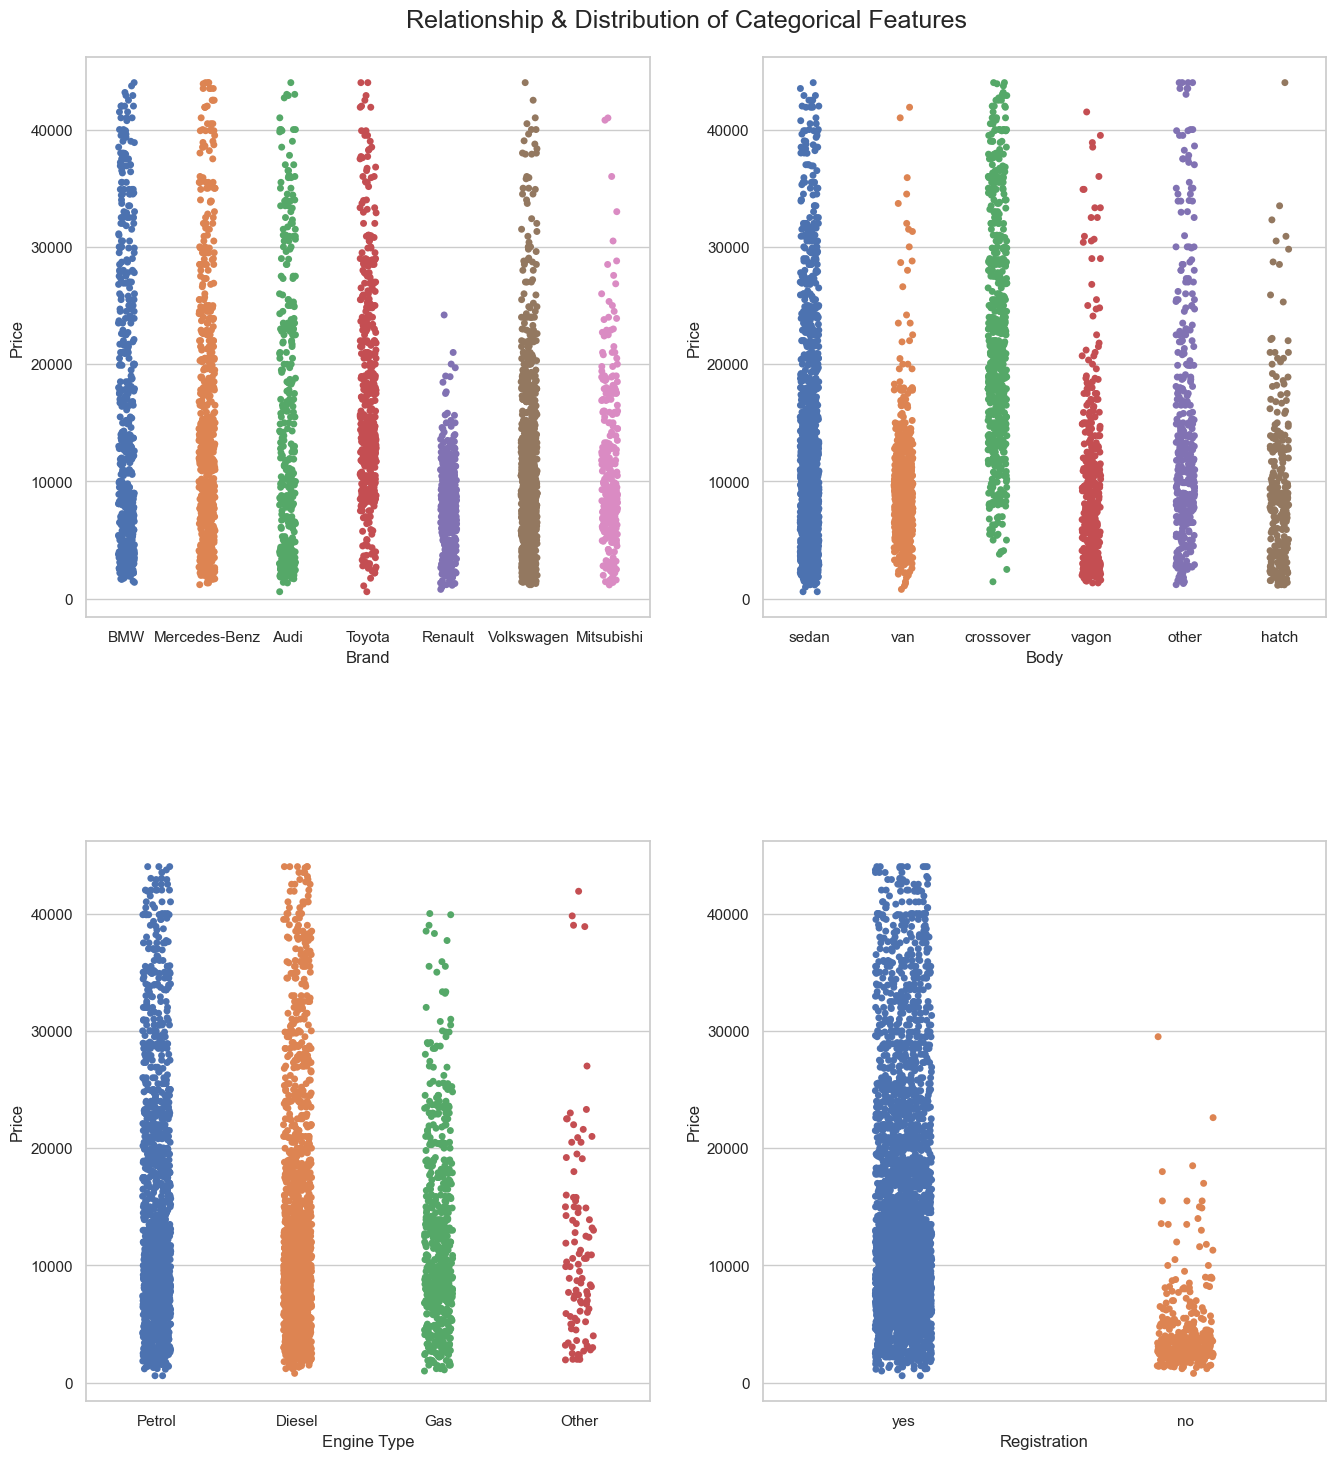

In [800]:
# Distribution of categorical features
sns.set(style="whitegrid")

# Plot stripplots for each categorical variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
plt.subplots_adjust(top=0.95, hspace=0.4)
fig.suptitle('Relationship & Distribution of Categorical Features', fontsize=18)
sns.stripplot(x="Brand", y="Price", data=vis_df, ax=axes.flatten()[0])
sns.stripplot(x="Body", y="Price", data=vis_df, ax=axes.flatten()[1])
sns.stripplot(x="Engine Type", y="Price", data=vis_df, ax=axes.flatten()[2])
sns.stripplot(x="Registration", y="Price", data=vis_df, ax=axes.flatten()[3])

plt.show()


From the stripplots above, we can see that dataset has a wide variety of cars at all Price points.

For the car's Brand, we can see that there are more data points clustered at Price <20,000, suggesting that the dataset has on average more cheaper cars than expensive ones. Whilst most brands sells cars at all Price points, Renault is an obvious outlier in that almost all of its cars sold are < 20,000 for Price. Mitsubishi also another outlier with the vast majority of its cars sold at ~<28,000 Price.

Looking at a car's Body, we can see that Sedan and Crossover types have cars sold at all Price ranges, and Van, Vagon, and Hatch types are generally <20,000 Price.

Moving on to Engine Type, most Engine Types have cars sold at all price range, but Gas Engine Types car have fewer expensive cars >25,000 Price, as can be seen from the more sparsely populated stripplot.

In [36]:
vis_df = pd.DataFrame(vis_df)
vis_df = vis_df[['Brand', 'Body', 'Engine Type', 'Registration', 'Price']]
vis_df2 = vis_df.groupby("Brand")["Price"].median().sort_values().index.tolist()
vis_df3 = vis_df.groupby("Body")["Price"].median().sort_values().index.tolist()
vis_df4 = vis_df.groupby("Engine Type")["Price"].median().sort_values().index.tolist()
vis_df5 = vis_df.groupby("Registration")["Price"].median().sort_values().index.tolist()

<AxesSubplot:xlabel='Registration', ylabel='Price'>

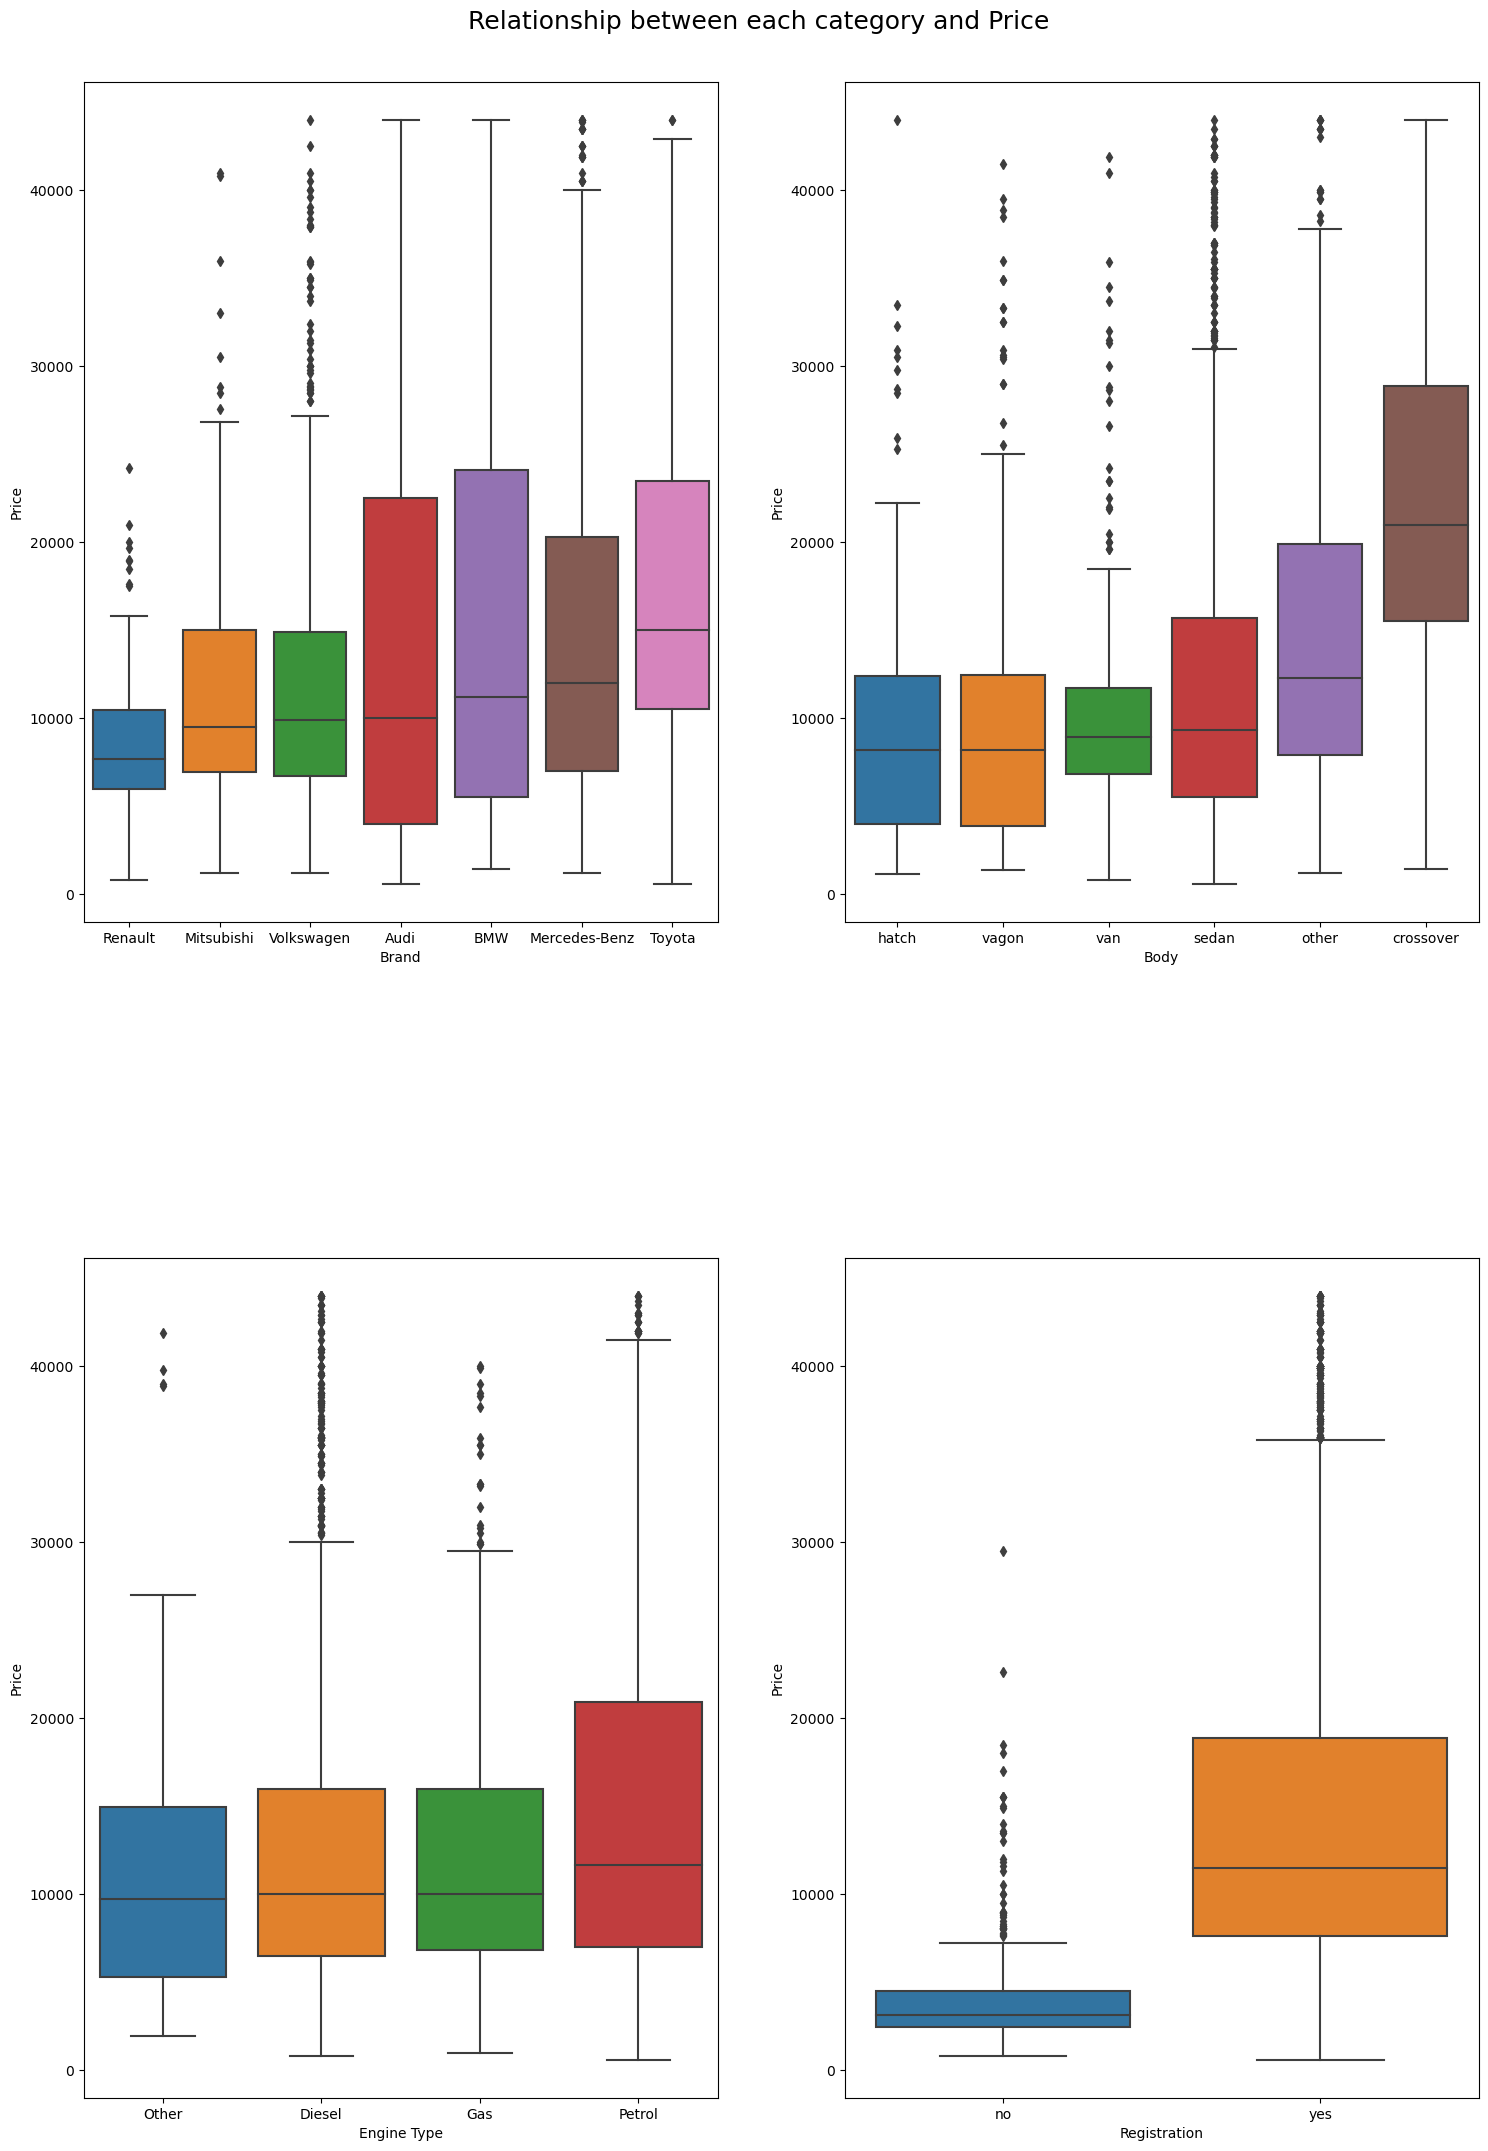

In [760]:
# Relationship between each category and Price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,24))
fig.suptitle('Relationship between each category and Price', fontsize=18)
plt.subplots_adjust(top=0.95, hspace=0.4)
sb.boxplot(x="Brand", y="Price", data=vis_df, order=vis_df2, ax=axes[0,0])
sb.boxplot(x="Body", y="Price", data=vis_df, order=vis_df3, ax=axes[0,1])
sb.boxplot(x="Engine Type", y="Price", data=vis_df, order=vis_df4, ax=axes[1,0])
sb.boxplot(x="Registration", y="Price", data=vis_df, order=vis_df5, ax=axes[1,1])

We have plotted 4 boxplots comparing each categorical feature and price, and we can determine if there is some correlation between each feature and price.

In terms of Engine Type, we can see that in general, most types of engine have approximately the same median selling Price, with the exception of Petrol, which has a slightly higher median than the rest. 

Furthermore, Registered cars have a significantly higher selling Price compared to ungregistered ones, with median of almost double that of unregisted ones.

We can also see that different car brands tend to have different median selling prices, with no identical median selling Price.

Crossover cars have a significantly higher selling price compared to other types of car Body, something for potential carowners to consider. This is followed by car Bodies that do not fit in any of the other predefined Body types, and then Sedan. Whilst the remaining Body types have more or less the same median selling price.

# 3) Methodology
Our response variable for our dataset is Price, a continuous variable. Hence, our problem is a regression problem. We will thus consider a few regression models.

In [38]:
# Create variables for feature data and price values
X = new_df.drop(["Price"], axis=1) # feature data train  (response)
y = new_df["Price"].values # price values train (predictor)

### Split the Dataset into Train and Test Datasets
We will select 80% of our dataset as our train dataset, and the remaining 20% as our test dataset.

The **input** will include the following features: <br>
Mileage<br>
EngineV<br>
Registration<br>
Year<br>
Engine Type_Gas, Engine Type_Petrol, Engine Type_Diesel, Engine Type_Other<br>
Brand_Audi, Brand_BMW, Brand_Mercedes-Benz, Brand_Mitsubishi, Brand_Renault, Brand_Toyota<br>
Model_Vista, Model_Vito, Model_X1, Model_X3, Model_X5, Model_X5 M, Model_X6, Model_Yaris, Model_Z3, Model_Z4 ...<br>


The **output** will be the car Price.

We will be using the same inputs and outputs for all the following regression models.

In [39]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

  ### The Linear Regression Model

Linear Regression is a widely used supervised learning algorithm in machine learning due to its simplicity and interpretability. It is used to predict continuous numerical values based on one or more independent variables or features. Independent variables or features such as the car's mileage, brand, engine version etc can be used to predict car pricings. <br>

The goal of a linear regression model is to find a linear relationship between the independent variables and the dependent variable (i.e., car price). The model does this by estimating the values of the coefficients that multiply each independent variable, such that the sum of the product of these coefficients and independent variables, along with an intercept term, results in the predicted value of the dependent variable (i.e., car price). <br>

Once the model is trained on a training dataset, it can be used to predict the car prices on unseen data by applying the learned coefficients to the independent variables of the new data. The accuracy of the model's prediction is typically evaluated using metrics such as the mean squared error (MSE) or R-squared. <br>

However, it also has some limitations. For example, it assumes that the relationship between the independent variables and the dependent variable is linear, and it can be sensitive to outliers and multicollinearity. Nevertheless, it remains a useful model for predicting car prices and other numerical values in many real-world applications.


### Obtain HyperParameters for the Linear Regression Model

These are the default hyperparameters for the Linear Regression model.

In [40]:
linreg_model = LinearRegression()
linreg_model_params = linreg_model.get_params()
linreg_model_params

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### Training for  Linear Regression Model

In [41]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model 

LinearRegression()

In [42]:
y_train_pred = linreg.predict(X_train)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_train, y_train_pred)

### LinearRegression Training Results
The LinearRegression model seems to have good fit our training dataset and achieve the following the results on the training dataset:<br>
- Explained Variance (R²) 	: 0.8417371648276059 
- Mean Squared Error (MSE) 	: 14073180.660390412
- Root Mean Squared Error (RMSE) 	: 3751.4238177511234 

In [43]:
print("Goodness Fit of Model (Train set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", linreg.score(X_train, y_train))

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Train set)
Explained Variance (R²) 	: 0.8417371648276059
Mean Squared Error (MSE) 	: 14073180.660390412
Root Mean Squared Error (RMSE) 	: 3751.4238177511234


### Testing for  Linear Regression Model

In [44]:
y_test_pred = linreg.predict(X_test)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_test, y_test_pred)

### LinearRegression Testing Results
The LinearRegression model doesn't seems to fit our testing dataset and achieve the following the results on the testing dataset:<br>
- Explained Variance (R²) 	: -4.24883870973393e+20
- Mean Squared Error (MSE) 	: 4.381265430358157e+28
- Root Mean Squared Error (RMSE) 	: 209314725481943.97

In [45]:
print("Goodness Fit of Model (Test set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", linreg.score(X_test, y_test))

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Test set)
Explained Variance (R²) 	: -4.24883870973393e+20
Mean Squared Error (MSE) 	: 4.381265430358157e+28
Root Mean Squared Error (RMSE) 	: 209314725481943.97


### Tuning Linear Regression HyperParameters
We will be using GridSearchCV that runs through all the different parameters that is fed into the parameter grid and find the optimal set of hyperparameters for Linear Regression model, thereby improving its performance. 

- 'copy_x' and 'n_jobs' affects memory usage and computational efficiency respectively and are unlikely to explain why our model fits better.
- Setting 'fit_intercept' to True in linear regression models allows for the model to capture the intercept or constant term, which can reduce bias in the model. Setting 'positive' to True can force the coefficients to be positive, which can improve the interpretability of the model. Hence, we can see a better R² and RMSE values (indicative of a better fit) for our model.

In [46]:
parameters = {'copy_X': [0, 1],
                  'fit_intercept': [0, 1],
                  'n_jobs' : [-1, 1, 5, 10],
                  'positive'    : [0, 1]
                 }

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
grid_linreg = GridSearchCV(estimator=linreg_model, param_grid = parameters, cv = 2, n_jobs=-1)
grid_linreg.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_linreg.best_estimator_)
print("\n The best parameters across ALL searched params:\n",grid_linreg.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 LinearRegression(copy_X=0, fit_intercept=0, n_jobs=-1, positive=1)

 The best parameters across ALL searched params:
 {'copy_X': 0, 'fit_intercept': 0, 'n_jobs': -1, 'positive': 1}


### Retrain Linear Regression model using Tuned HyperParameters

Analysing the hyperparameters returned by GridSearchCV, the best parameters across ALL searched params:
 {'copy_X': 0, 'fit_intercept': 0, 'n_jobs': -1, 'positive': 1}.

In [49]:
linreg_tuned = LinearRegression(copy_X=0, fit_intercept=0, n_jobs=1, positive=1)
linreg_tuned.fit(X_train, y_train)

LinearRegression(copy_X=0, fit_intercept=0, n_jobs=1, positive=1)

#### LinearRegression Training results using Tuning HyperParameters
Our tuned Linear Regression model managed to achieve the following results on the following dataset:
- Explained Variance (R²) 	: 0.832822917797544
- Mean Squared Error (MSE) 	: 14865860.816592315
- Root Mean Squared Error (RMSE) 	: 3855.627162549864


In [50]:
y_train_pred = linreg_tuned.predict(X_train)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_train, y_train_pred)

print("Goodness Fit of Model (Train set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", linreg_tuned.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Train set)
Explained Variance (R²) 	: 0.832822917797544
Mean Squared Error (MSE) 	: 14865860.816592315
Root Mean Squared Error (RMSE) 	: 3855.627162549864


#### LinearRegression Testing results using Tuning HyperParameters
Our tuned Linear Regression model managed to achieve the following results on the following dataset:
- Explained Variance (R²) 	: 0.7211749826587799
- Mean Squared Error (MSE) 	: 28751536.432706818
- Root Mean Squared Error (RMSE) 	: 5362.04591855635

In [51]:
y_test_pred = linreg_tuned.predict(X_test)

print("Goodness Fit of Model (Test set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", linreg_tuned.score(X_test, y_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(y_test, y_test_pred)

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))


Goodness Fit of Model (Test set)
Explained Variance (R²) 	: 0.7211749826587799
Mean Squared Error (MSE) 	: 28751536.432706818
Root Mean Squared Error (RMSE) 	: 5362.04591855635


### Analysis
The large negative R² value and extreme RMSE value for our Test dataset before HyperTuning is indicative of a poor fit of the model. This suggests that the model is performing worse than a horizontal line, and is overfitting the training data. Overfitting means that the model has learned the training data too well and is unable to generalize to new data.

Hypertuning may have reduced the R² value for train data because it could have made the model less complex, reducing the overfitting on the training data. A simpler model may not perform as well on the training data but may generalize better to new data. But it is important to note that the difference in R² values is small (0.01) and have an insignificant impact on the fit of our model for train data. 

Hypertuning may have increased the R² value for test data because it could have found the optimal hyperparameters that better fit the test data. By fine-tuning the hyperparameters, the model can be adjusted to fit the data more closely, leading to better performance on the test data.




# 4) Experiment

For our experiments, we will be experimenting with 3 different regression models:
- Lasso
- Elastic Net
- Ridge Regression
<br><br>

To measure the effectiveness of our experiments and compare them with our baseline Linear Regression model, we will be using the following metrics:
- Explained Variance (R²) = Goodness of fit of regression model. R² value ranges from 0 to 1, with a value of 1 indicating a perfect fit.
- Mean Squared Error (MSE) = Average of the squared errors (differences between actual and predicted values). The MSE value ranges from 0 to infinity, with a lower value indicating a better fit.
- Root Mean Squared Error (RMSE) = Average magnitude of the errors in a regression model (square root of MSE). Lower value of the RMSE indicates a better fit.


<br> After analysing each model's effectiveness, we will attempt to tune the hyperparameters of all our models to maximize each model's performance. Once all the models are tuned, we will then test the tuned model using our test dataset. The best model is ultimately chosen by comparing the performance of different models.

### The Lasso Model

Lasso regression is a type of linear regression model that can be used for predicting car prices based on different factors. It is a regularized regression method that can handle high-dimensional datasets by shrinking the coefficients of irrelevant or less important features to zero, while keeping the important features with non-zero coefficients.

The Lasso model is used to find a linear relationship between the independent variables (such as mileage, age, brand, horsepower, engine capacity, etc.) and the dependent variable (i.e. car price) by minimizing the sum of the squared errors between the predicted and actual values. In addition to this, it also adds a penalty term to the loss function, which is a multiple of the sum of the absolute values of the coefficients. This penalty term encourages the model to keep only the important features and reduce the effect of irrelevant features.


Lasso regression has several advantages over ordinary linear regression, such as feature selection, which helps to identify the most important features for predicting the car prices, and reducing overfitting, which can occur in high-dimensional datasets. 

However, it also has some limitations, such as the inability to handle multicollinearity and the need for careful tuning of the regularization parameter.

### Obtain HyperParameters for the Lasso Model

These are the default hyperparameters for the Lasso model.

In [52]:
lasso_model = Lasso(random_state=128)
lasso_model_params = lasso_model.get_params()
lasso_model_params

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': 128,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

### Training for  Lasso Model

In [53]:
# Lasso using Train Data
lasso = Lasso()         
lasso.fit(X_train, y_train)        

Lasso()

In [54]:
y_train_pred = lasso.predict(X_train)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_train, y_train_pred)


### Lasso Training Results
The Lasso model seems to have good fit our training dataset and achieve the following the results on the training dataset:<br>
- Explained Variance (R²) 	: 0.8384426377152502
- Mean Squared Error (MSE) 	: 14366139.365396755
- Root Mean Squared Error (RMSE) 	: 3790.2690360179913

In [55]:
print("Goodness Fit of Model (Train set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", lasso.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Train set)
Explained Variance (R²) 	: 0.8384426377152502
Mean Squared Error (MSE) 	: 14366139.365396755
Root Mean Squared Error (RMSE) 	: 3790.2690360179913



### Testing for Lasso Model

In [56]:
y_test_pred = lasso.predict(X_test)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_test, y_test_pred)


### Lasso Testing Results
The Lasso model seems to have good fit our testing dataset and achieve the following the results on the testing dataset:<br>
- Explained Variance (R²) 	: 0.7909242879003221
- Mean Squared Error (MSE) 	: 21559213.05394048
- Root Mean Squared Error (RMSE) 	: 4643.189965308385

In [62]:
print("Goodness Fit of Model (Test set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", lasso.score(X_test, y_test))

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Test set)
Explained Variance (R²) 	: 0.7909242879003221
Mean Squared Error (MSE) 	: 14366139.365396755
Root Mean Squared Error (RMSE) 	: 3790.2690360179913


### Tuning Lasso HyperParameters
We will be using GridSearchCV that runs through all the different parameters that is fed into the parameter grid and find the optimal set of hyperparameters for Lasso model, thereby improving its performance. 

In [63]:
parameters = { 'alpha' : [0.005, 0.02, 0.03, 0.05, 0.06, 0.0001, 0.001, 0.01, 0.1, 1, 10,100,1000],
                'fit_intercept' : [0, 1],
                'positive': [0,1],
                'selection' : ['cyclic', 'random']
             }

In [64]:
grid_lasso = GridSearchCV(lasso,parameters)
grid_lasso = grid_lasso.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_lasso.best_estimator_)
print("\n The best parameters across ALL searched params:\n",grid_lasso.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 Lasso(alpha=1, fit_intercept=1, positive=0)

 The best parameters across ALL searched params:
 {'alpha': 1, 'fit_intercept': 1, 'positive': 0, 'selection': 'cyclic'}


### Retrain Lasso model using Tuned HyperParameters

Analysing the hyperparameters returned by GridSearchCV, the best and relavant parameters across ALL searched params that affects estimation: Lsso(alpha=1, fit_intercept=1, positive=0)

In [65]:
lasso_tuned = Lasso(alpha = 1, fit_intercept= 1, positive = 0, selection = 'cyclic')
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=1, fit_intercept=1, positive=0)

#### Lasso  Training results using Tuning HyperParameters
Our tuned Lasso model managed to achieve the following results on the following dataset:
- Explained Variance (R²) 	: 0.8384426377152502
- Mean Squared Error (MSE) 	: 14366139.365396755
- Root Mean Squared Error (RMSE) 	: 3790.2690360179913

In [66]:
# Predict Price values corresponding to Selected Features
y_train_pred = lasso_tuned.predict(X_train)

print("Goodness Fit of Model (Train set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", lasso_tuned.score(X_train, y_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(y_train, y_train_pred)

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Train set)
Explained Variance (R²) 	: 0.8384426377152502
Mean Squared Error (MSE) 	: 14366139.365396755
Root Mean Squared Error (RMSE) 	: 3790.2690360179913


#### Lasso Testing results using Tuning HyperParameters
Our tuned Lasso model managed to achieve the following results on the following dataset:
- Explained Variance (R²) 	: 0.7909242879003221
- Mean Squared Error (MSE) 	: 21559213.05394048
- Root Mean Squared Error (RMSE) 	: 4643.189965308385

In [67]:
y_test_pred = lasso_tuned.predict(X_test)

print("Goodness Fit of Model (Test set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", lasso_tuned.score(X_test, y_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(y_test, y_test_pred)

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Test set)
Explained Variance (R²) 	: 0.7909242879003221
Mean Squared Error (MSE) 	: 21559213.05394048
Root Mean Squared Error (RMSE) 	: 4643.189965308385


#### Default parameters are already performing at their best (R² and RMSE values unchanged), so we won't alter them any further.

### The Gradient Boosting Regressor Model

Gradient Boosting Regressor is a popular machine learning algorithm that can be used to predict car prices based on different factors. It is an ensemble method that combines multiple decision trees to form a strong predictive model. The algorithm works by iteratively adding decision trees to the model, each one correcting the errors of the previous tree.

The key idea is that the algorithm starts by fitting a simple decision tree to the data and making predictions. The errors (i.e., residuals) of this initial model are then calculated, and a second decision tree is fitted to the residuals. The predictions of the second tree are added to the predictions of the first tree to create a better prediction. This process is repeated multiple times, with each new decision tree trying to improve the predictions of the previous trees by correcting their errors.

Gradient Boosting Regressor can handle both numerical and categorical variables, making it useful for predicting car prices based on a variety of factors such as brand, model, mileage and more. It uses a loss function, such as mean squared error (MSE), to measure the difference between the predicted values and the actual values. It then optimizes the loss function using a gradient descent algorithm to find the best set of parameters for the model and includes regularization techniques, such as learning rate and max_depth, to prevent overfitting and improve the generalization of the model.



### Obtain HyperParameters for the Gradient Boosting Regressor
These are the default hyperparameters for the Gradient Boosting Regressor model.

In [68]:
GBR_model = GradientBoostingRegressor()
GBR_model_params = GBR_model.get_params()
GBR_model_params

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Training for Gradient Boosting Regressor Model

In [69]:
GBR = GradientBoostingRegressor()      
GBR.fit(X_train, y_train)        

GradientBoostingRegressor()

In [70]:
y_train_pred = GBR.predict(X_train)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_train, y_train_pred)

### GBR Training Results
The GBR model seems to have good fit our training dataset and achieve the following the results on the training dataset:<br>
- Explained Variance (R²) 	: 0.9085565693063211
- Mean Squared Error (MSE) 	: 8131409.493304135
- Root Mean Squared Error (RMSE) 	: 2851.562640606749

In [71]:
print("Goodness Fit of Model (Train set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", GBR.score(X_train, y_train))

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Train set)
Explained Variance (R²) 	: 0.9085565693063211
Mean Squared Error (MSE) 	: 8131409.493304137
Root Mean Squared Error (RMSE) 	: 2851.5626406067495



### Testing for GBR Model

In [72]:
y_test_pred = GBR.predict(X_test)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_test, y_test_pred)

### GBR Testing Results
The GBR model seems to have good fit our testing dataset and achieve the following the results on the testing dataset:<br>
- Explained Variance (R²) 	: 0.8756569204523628
- Mean Squared Error (MSE) 	: 12821857.291929364
- Root Mean Squared Error (RMSE) 	: 3580.762110491196

In [73]:
print("Goodness Fit of Model (Test set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", GBR.score(X_test, y_test))

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Test set)
Explained Variance (R²) 	: 0.8756569204523628
Mean Squared Error (MSE) 	: 12821857.291929364
Root Mean Squared Error (RMSE) 	: 3580.762110491196


### Tuning Gradient Boosting Regressor HyperParameters
We will be using GridSearchCV that runs through all the different parameters that is fed into the parameter grid and find the optimal set of hyperparameters for GBR model, thereby improving its performance. 


In [80]:
parameters = { 'loss' : ['huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['friedman_mse', 'squared_error'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [81]:
grid_GBR = GridSearchCV(GBR,parameters)
grid_GBR = grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.5, loss='huber', max_features='auto')

 The best parameters across ALL searched params:
 {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'huber', 'max_features': 'auto'}


### Retrain GBR model using Tuned HyperParameters

In [83]:
GBR_tuned = GradientBoostingRegressor(criterion = 'friedman_mse', learning_rate = 0.5, loss = 'huber', max_features = 'auto')
GBR_tuned.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, loss='huber', max_features='auto')

#### GBR  Training results using Tuning HyperParameters
Our tuned GBR model managed to achieve the following results on the following dataset:
- Explained Variance (R²) 	: 0.9456458479011292
- Mean Squared Error (MSE) 	: 4833325.532785449
- Root Mean Squared Error (RMSE) 	: 2198.482552304077

In [86]:
y_train_pred = GBR_tuned.predict(X_train)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_train, y_train_pred)

print("Goodness Fit of Model (Train set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", GBR_tuned.score(X_train, y_train))

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Train set)
Explained Variance (R²) 	: 0.9456458479011292
Mean Squared Error (MSE) 	: 4833325.532785449
Root Mean Squared Error (RMSE) 	: 2198.482552304077


#### GBR Testing results using Tuning HyperParameters
Our tuned GBR model managed to achieve the following results on the following dataset:
- Explained Variance (R²) 	: 0.8984437479488029
- Mean Squared Error (MSE) 	: 10472153.139852019
- Root Mean Squared Error (RMSE) 	: 3236.0706327044254

In [87]:
y_test_pred = GBR_tuned.predict(X_test)

print("Goodness Fit of Model (Test set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", GBR_tuned.score(X_test, y_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(y_test, y_test_pred)

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Test set)
Explained Variance (R²) 	: 0.8984437479488029
Mean Squared Error (MSE) 	: 10472153.139852019
Root Mean Squared Error (RMSE) 	: 3236.0706327044254


#### We have found that the hyperparameters returned by GridSearchCV provides a better Goodness Fit of model and lesser MSE, hence we will adjust the hyperparemeters of GBR Model accordingly.

### The Ridge Regression Model

Ridge regression is a type of linear regression model that can be used to predict car prices based on different factors. It is a regularized regression method that can handle high-dimensional datasets by shrinking the coefficients of irrelevant or less important features towards zero, while still keeping all features in the model.

The model is used to identify the most important factors for predicting the car prices and to estimate the effect of each factor on the car prices. It is used to find a linear relationship between the independent variables (such as mileage, age, brand, horsepower, engine capacity, etc.) and the dependent variable (i.e., car price) by minimizing the sum of the squared errors between the predicted and actual values, subject to a penalty term. This penalty term is the multiple of the sum of the SQUARED values of the coefficients., which encourages the model to reduce the effect of irrelevant features and focus on the important features.

In the context of predicting car prices,  It can also be used to make predictions for new cars based on their features and to evaluate the performance of the model using metrics such as R-squared and mean squared error.

Ridge regression has several advantages over ordinary linear regression, such as reducing overfitting, which can occur in high-dimensional datasets, and improving the stability of the model by reducing the variance of the estimates.

However, it also has some limitations, such as the inability to handle multicollinearity and the need for careful tuning of the regularization parameter.


### Obtain HyperParameters for the Ridge Regression Model
These are the default hyperparameters for the Ridge Regression model.

In [88]:
ridge_model = Ridge()
ridge_model_params = ridge_model.get_params()
ridge_model_params

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

### Training for Ridge Regression Model

In [89]:
ridge = Ridge()        
ridge.fit(X_train, y_train)

Ridge()

In [90]:
y_train_pred = ridge.predict(X_train)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_train, y_train_pred)

### Ridge Regression Training Results
The Ridge Regression model seems to have good fit our training dataset and achieve the following the results on the training dataset:<br>
- Explained Variance (R²) 	: 0.8336528192418362
- Mean Squared Error (MSE) 	: 14792063.623820428
- Root Mean Squared Error (RMSE) 	: 3846.0451926388523

In [91]:
print("Goodness Fit of Model (Train set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", ridge.score(X_train, y_train))

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Train set)
Explained Variance (R²) 	: 0.8336528192418362
Mean Squared Error (MSE) 	: 14792063.623820428
Root Mean Squared Error (RMSE) 	: 3846.0451926388523



### Testing for Ridge Regression Model

In [92]:
y_test_pred = ridge.predict(X_test)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_test, y_test_pred)

### Ridge Regression Testing Results
The Ridge Regression model seems to have good fit our testing dataset and achieve the following the results on the testing dataset:<br>
- Explained Variance (R²) 	: 0.7912300265259387
- Mean Squared Error (MSE) 	: 21527686.27303279
- Root Mean Squared Error (RMSE) 	: 4639.79377483879

In [93]:
print("Goodness Fit of Model (Test set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", ridge.score(X_test, y_test))

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Test set)
Explained Variance (R²) 	: 0.7912300265259387
Mean Squared Error (MSE) 	: 21527686.27303279
Root Mean Squared Error (RMSE) 	: 4639.79377483879


### Tuning Ridge Regression HyperParameters
We will be using GridSearchCV that runs through all the different parameters that is fed into the parameter grid and find the optimal set of hyperparameters for Ridge Regression model, thereby improving its performance. 

Analysing the hyperparameters returned by GridSearchCV, the best parameters across ALL searched params that affects estimation: Ridge(alpha = 1, solver = 'auto', positive = 0)

In [94]:
parameters = { 'alpha' : [0.005, 0.02, 0.03, 0.05, 0.06, 0.0001, 0.001, 0.01, 0.1, 1, 10,100,1000],
              'positive': [0,1],
              'solver': ['auto']
             }

In [95]:
grid_ridge = GridSearchCV(ridge,parameters)
grid_ridge = grid_ridge.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_ridge.best_estimator_)
print("\n The best parameters across ALL searched params:\n",grid_ridge.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 Ridge(alpha=1, positive=0)

 The best parameters across ALL searched params:
 {'alpha': 1, 'positive': 0, 'solver': 'auto'}


### Retrain Ridge Regression model using Tuned HyperParameters

In [96]:
ridge_tuned = Ridge(alpha = 1, solver = 'auto', positive = 0)
ridge_tuned.fit(X_train, y_train)

Ridge(alpha=1, positive=0)

#### Ridge Regression  Training results using Tuning HyperParameters
Our tuned Ridge Regression model managed to achieve the following results on the following dataset:
- Explained Variance (R²) 	: 0.8336528192418362
- Mean Squared Error (MSE) 	: 14792063.623820428
- Root Mean Squared Error (RMSE) 	: 3846.0451926388523

In [97]:
y_train_pred = ridge_tuned.predict(X_train)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_train, y_train_pred)

print("Goodness Fit of Model (Train set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", ridge_tuned.score(X_train, y_train))

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Train set)
Explained Variance (R²) 	: 0.8336528192418362
Mean Squared Error (MSE) 	: 14792063.623820428
Root Mean Squared Error (RMSE) 	: 3846.0451926388523


#### Ridge Regression Testing results using Tuning HyperParameters
Our tuned Ridge Regression model managed to achieve the following results on the following dataset:
- Explained Variance (R²) 	: 0.7914456349458856
- Mean Squared Error (MSE) 	: 21505453.42821701
- Root Mean Squared Error (RMSE) 	: 4637.39726875076

In [98]:
y_test_pred = ridge_tuned.predict(X_test)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_test, y_test_pred)


print("Goodness Fit of Model (Test set)")

# Explained Variance (R²)
print("Explained Variance (R²) \t:", ridge_tuned.score(X_test, y_test))

print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Fit of Model (Test set)
Explained Variance (R²) 	: 0.7912300265259387
Mean Squared Error (MSE) 	: 21527686.27303279
Root Mean Squared Error (RMSE) 	: 4639.79377483879


#### The default parameters are already performing at their best (R² and RMSE values unchanged), so we won't alter them any further.

## Comparing performance of 4 models

### Comparing Train performance

Overall, all our models have managed to fit well on our train dataset.

At this stage, we would rank the models in descending R² and ascending MSE & RMSE order:
1) Gradient Regressor Booster
2) Lasso
3) Ridge Regression
4) Linear Regression


| Model | R-squared (R²) | Mean Squared Error (MSE) | Root Mean Squared Error (RMSE)  |
| :- | :-: | :-: | :-: |
| Linear regression | 0.8328 | 14865860 | 3855 |
| Lasso | 0.8384 | 14366139 | 3790 |
| Gradient Regressor Booster | 0.9456 | 4833325 | 2198 |
| Ridge Regression | 0.8336 | 14792063 | 3846 |

### Comparing Test performance

Overall, all our models have managed to fit well on our test dataset.

At this stage, we would rank the models in descending R² and ascending MSE & RMSE order:
1) Gradient Regressor Booster
2) Ridge Regression
3) Lasso
4) Linear Regression


| Model | R-squared (R²) | Mean Squared Error (MSE) | Root Mean Squared Error (RMSE)  |
| :- | :-: | :-: | :-: |
| Linear regression | 0.7211 | 28751536 | 5362 |
| Lasso | 0.7909 | 21559213 | 4643 |
| Gradient Regressor Booster | 0.8984 | 10472153 | 3236 |
| Ridge Regression | 0.7912 | 21527686 | 4639 |

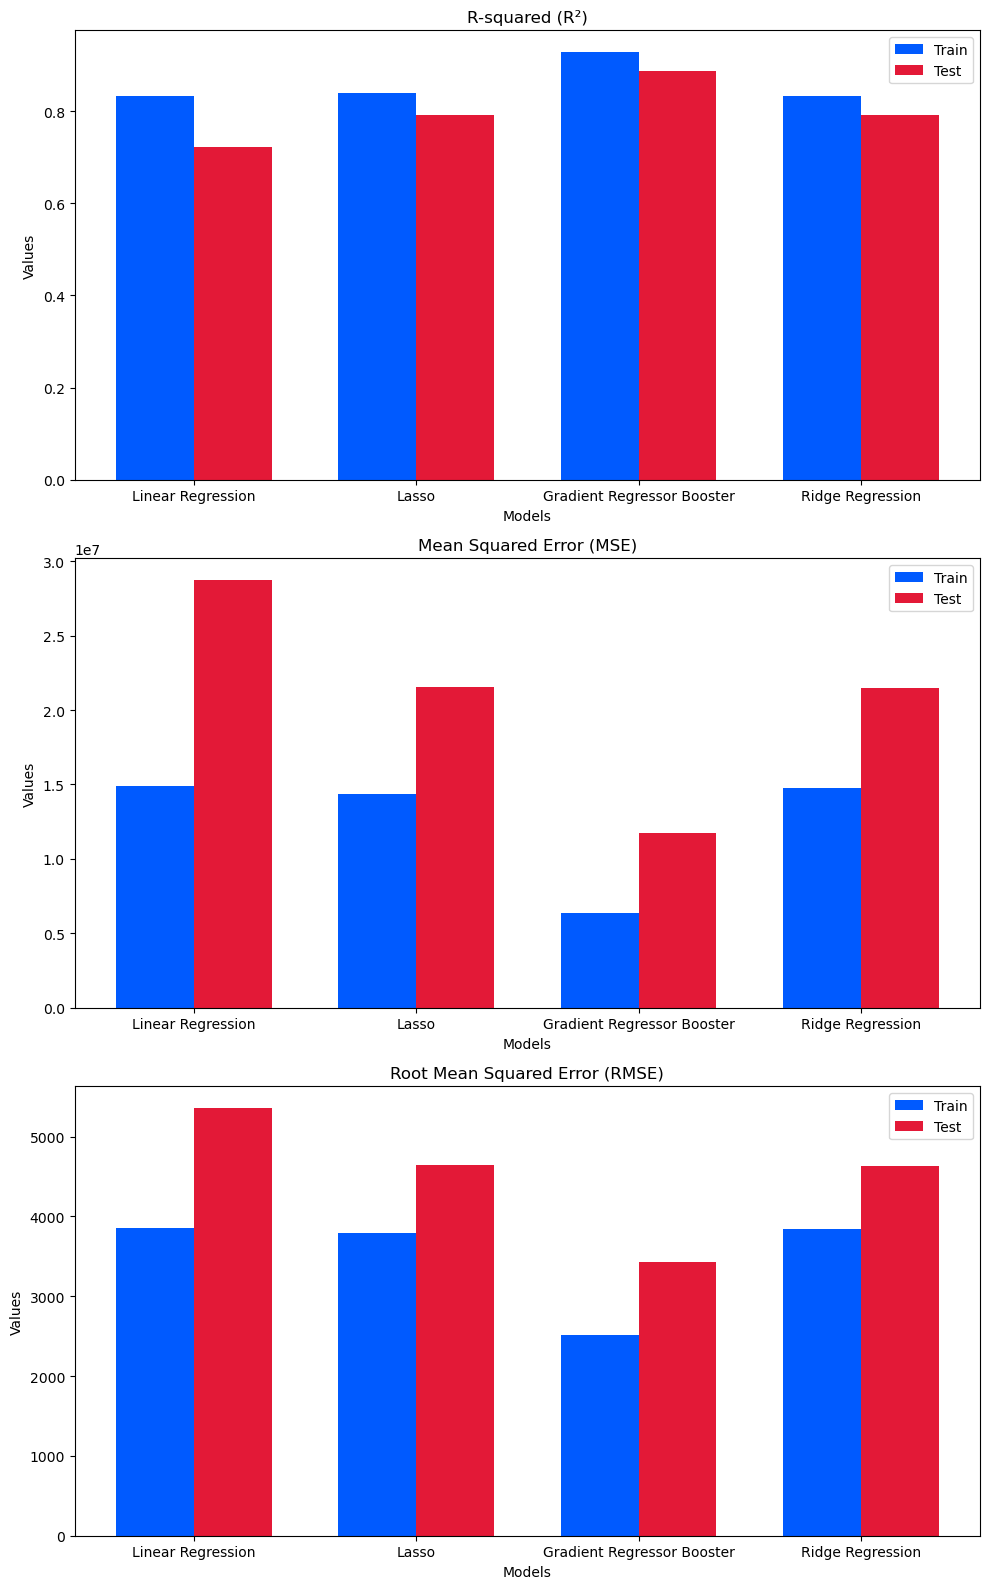

In [743]:
# Visual representation of table
models = ['Linear Regression', 'Lasso', 'Gradient Regressor Booster', 'Ridge Regression']
r_squared_train = [0.8328, 0.8384, 0.9287, 0.8337]
mse_train = [14865861, 14366139, 6337768, 14792064]
rmse_train = [3856, 3790, 2517, 3846]
r_squared_test = [0.7212, 0.7909, 0.8861, 0.7914]
mse_test = [28751536, 21559213, 11749565, 21505453]
rmse_test = [5362, 4643, 3427, 4637]

# Define colors for each model
colors1 = ['#005AFF', '#005AFF', '#005AFF', '#005AFF']
colors2 = ['#E31937', '#E31937', '#E31937', '#E31937']

# Define the bar width
bar_width = 0.35

# Create subplots with shared X-axis
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 16), sharex=True)

# R-squared plot
axs[0].bar(np.arange(len(models)), r_squared_train, width=bar_width, color=colors1, label='Train')
axs[0].bar(np.arange(len(models)) + bar_width, r_squared_test, width=bar_width, color=colors2, label='Test')
axs[0].set_title('R-squared (R²)')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('Values')
axs[0].legend()
axs[0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

# MSE plot
axs[1].bar(np.arange(len(models)), mse_train, width=bar_width, color=colors1, label='Train')
axs[1].bar(np.arange(len(models)) + bar_width, mse_test, width=bar_width, color=colors2, label='Test')
axs[1].set_title('Mean Squared Error (MSE)')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Values')
axs[1].legend()
axs[1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

# RMSE plot
axs[2].bar(np.arange(len(models)), rmse_train, width=bar_width, color=colors1, label='Train')
axs[2].bar(np.arange(len(models)) + bar_width, rmse_test, width=bar_width, color=colors2, label='Test')
axs[2].set_title('Root Mean Squared Error (RMSE)')
axs[2].set_xlabel('Models')
axs[2].set_ylabel('Values')
axs[2].legend()
axs[2].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

# Set X-axis ticks and labels for each subplot
for ax in axs:
    ax.set_xticks(np.arange(len(models)) + bar_width / 2)
    ax.set_xticklabels(models)

plt.tight_layout()
plt.show()


#### In short, the Gradient Regressor Booster Model provides the best R² as well as the lowest MSE & RMSE. The Ridge Regression and Lasso models follow. Finally, Linear Regression with the worst R² and the highest MSE & RMSE.

# 5) Conclusion

### Summary of findings

In this project, we have effectively identified and processed relevant features from the dataset, and built an highly-accurate machine learning model that could accurately predict car prices based on trained and tested data. To select our best model, we have used a variety of metrics such as R-squared (R²) score, Mean Squared Error (MSE), Root Mean Squared Error (RMSE) to measure each model's effectiveness in predicting car price.

As the Gradient Boosting Regressor model performed the best in our final train & test dataset, we can conclude that the Gradient Regressor Booster model is our best model in terms of its Goodness of Fit and ability to predict car price, with a final R² of 0.9456 (train) and 0.8984 (test).

In addition to successfully building a model, we have also demonstrated how different regression models can be used to train our dataset and how we utilise GridSearchCV for hyperparameter tuning to maximise different model's performance.

We also found that different models will have different prediction processes, and hence will use different features to make decisions. For example, our baseline Linear Regression does not include any regularization term, the Lasso and Ridge Regression models that placed more emphasis on regularization parameter alpha and lastly, Gradient Booster Regressor that focus on n_estimators, learning_rate and max_depth to optimize model's performance.

### Limitation and Possible Improvements

##### Limitation
Each machine learning model has its own strengths and limitations. For our chosen model (Gradient Boosting Regressor) in this context, there are mainly 2 limitations: expensive computational cost, sensitivity to hyperparameters and overfitting.

One of the limitations of our chosen model (Gradient Boosting Regressor) is that it is computationally expensive, even for our relatively small dataset, it took a significant amount of time to train and cost a large amount of computational power to compute. Extending our model to a larger car sales dataset may result in longer training times apart from increased computational costs.

The performance of gradient boosting models is highly dependent on the values of hyperparameters such as the learning rate, number of trees, and maximum depth of the trees. Following from the previous limitation, finding the optimal values of learning rate hyperparameters is not only challenging, but also consumes a significant amount of times and computational resources. 

Another limitation is overfitting. Overfitting occurs when a model is too complex and has learned the training data too well, leading to poor generalization performance on new, unseen data. This can happen when the model is too flexible, and is able to fit the noise in the training data, rather than the underlying signal. As a result, the model performs very well on the training data, but poorly on the test data. As observed from the above table, the R² value for our test dataset (0.89) is slightly lower than our train dataset (0.94), which suggest that our model is overfitting to the training data, and is unable to generalise as well to new data.

##### Improvement
We can apply L1 and L2 regularisation techniques to our model to prevent overfitting. Such techniques add penalty terms to the loss function to prevent overfitting. This encourages the model to find the simplest solution that fits the data well, by discouraging the model from fitting to the noise of the data. 

We can also combine our model with ensemble methods. Ensemble methods include Bagging (short for bootstrap aggregating) and stacking. 

Bagging involves randomly selecting subsets of training data and then training the model on each subset. The predictions of each model is then collected and combined to make a final prediction. By training multiple models using different subsets of data, bagging can reduce the impact of overfitting.

Stacking is similar to bagging but uses the predictions from each sub model as inputs a meta-model. The meta-model is then trained to combine these predictions to make the final prediction. 

By using predictions of multiple models, ensemble methods can reduce overfitting of our current model and improve our model's prediction accuracy.


### References

- car_sales.csv. (2020, May 9). Kaggle. https://www.kaggle.com/datasets/smritisingh1997/car-salescsv
https://www.kaggle.com/code/smritisingh1997/car-price-prediction-using-linear-regression/input
- Team, D. (2022). "Lasso and Ridge Regression in Python Tutorial." https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression
- Bhattacharyya, S. (2023, February 22). "Ridge and Lasso Regression: L1 and L2 Regularization." Medium. https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
- Trinidad, C. (2023). "Gradient Boosting." Corporate Finance Institute. https://corporatefinanceinstitute.com/resources/data-science/gradient-boosting/
- sklearn.ensemble.GradientBoostingRegressor. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
- sklearn.linear_model.Lasso. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso
- sklearn.linear_model.Ridge. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- sklearn.linear_model.LinearRegression. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- "Choosing the right estimator." (n.d.). Scikit-learn. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
- Smritisingh. (2020). "Car Price Prediction Using Linear Regression." Kaggle. 
- Healy, Y. H. a. C. (n.d.). From data to Viz | "Find the graphic you need." https://www.data-to-viz.com
- "How to find optimal parameters using GridSearchCV for Regression in ML in python" -. (2023, January 19). ProjectPro. https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv-for-regression
- Great Learning Team. (2022, June 13). "Hyperparameter Tuning with GridSearchCV" https://www.mygreatlearning.com/blog/gridsearchcv/#:~:text=What%20is%20GridSearchCV%20used%20for,essentially%20a%20cross%2Dvalidation%20technique
- Acharya, S. (2022, January 6). "How to improve the accuracy of a Regression Model - Towards Data Science." Medium. https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604